# Feature Engineering

Feature engineering involves creating, transforming, and selecting features that will help improve the performance of machine learning models. It is often the most important step in the machine learning workflow.

---

## Table of Contents

1. [Introduction to Feature Engineering](#1-introduction-to-feature-engineering)
2. [Creating New Features](#2-creating-new-features)
3. [Transforming Features](#3-transforming-features)
4. [Feature Selection](#4-feature-selection)

---



## 1. Introduction to Feature Engineering

Good features are key to making machine learning models perform well. Feature engineering can involve creating new features, combining existing features, or transforming data to better represent the underlying patterns.

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv("categorical_data.csv")

data.head()

,ID,Product_Name,Category,Region,Price,Sales,Discount_Percentage,Customer_Rating
0,1,Product_1,Furniture,South,870.28,6451,13.86,4.5
1,2,Product_2,Books,South,525.13,7745,39.55,3.6
2,3,Product_3,Furniture,West,809.60,8295,43.45,2.6
3,4,Product_4,Books,South,953.33,7416,49.26,1.9
4,5,Product_5,Food,North,363.77,9391,19.13,2.0


## 2. Creating New Features

Creating new features can often reveal patterns that improve model performance. Examples include creating ratios, differences, or aggregating information from multiple features.

In [20]:
data["Total Income"] = data["Price"] * data["Sales"]
print("New features added:\n", data[["Price","Sales","Total Income"]].head())

New features added:
     Price  Sales  Total Income
0  870.28   6451    5614176.28
1  525.13   7745    4067131.85
2  809.60   8295    6715632.00
3  953.33   7416    7069895.28
4  363.77   9391    3416164.07


## 3. Transforming Features

Feature transformation involves changing the format or values of features, such as applying log transformations, normalizations, or one-hot encoding.

In [21]:
data["Log Sales"] = np.log1p(data["Sales"])
print("Log-transformed Sales:\n", data[['Sales', 'Log Sales']].head())

Log-transformed Sales:
    Sales  Log Sales
0   6451   8.772145
1   7745   8.954932
2   8295   9.023529
3   7416   8.911530
4   9391   9.147614


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[["Scaled Price"]] = scaler.fit_transform(data[["Price"]])
print("Scaled features:\n", data[['Price', 'Scaled Price']].head())


Scaled features:
     Price  Scaled Price
0  870.28      1.403863
1  525.13      0.142732
2  809.60      1.182147
3  953.33      1.707317
4  363.77     -0.446856


## 4. Feature Selection

Feature selection involves identifying the most important features that contribute to model performance. Reducing the number of features can improve model interpretability and reduce overfitting.

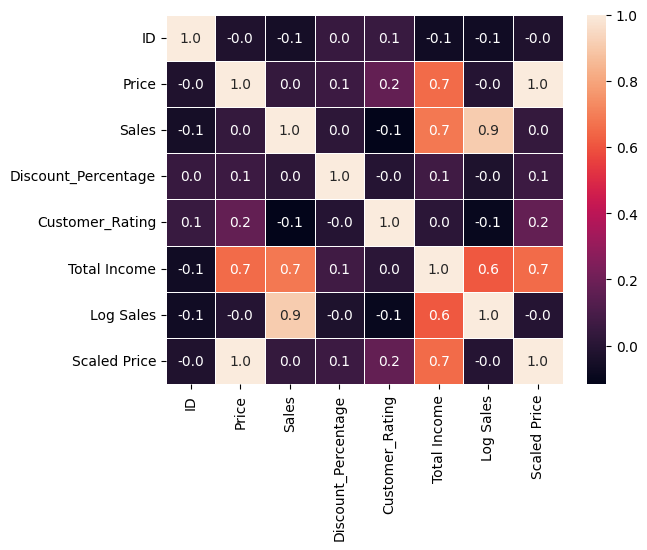

In [26]:
cor_matrix = data.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cor_matrix,annot=True,fmt=".1f",linewidth=.5)
plt.show()

Highly correlated features can often be reduced to a single feature, helping to simplify the model.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=5)

num_data = data[data.select_dtypes(include=["int64","float64"]).columns.tolist()]
num_data.drop(columns=["ID"],inplace=True)

X = num_data.drop(columns="Sales")
y = data["Sales"]
rfe.fit(X,y)

selected_features = X.columns[rfe.support_]
print("Selected features using RFE:\n", selected_features)

C:\Users\Gökdeniz\AppData\Local\Temp\ipykernel_5272\843040281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.drop(columns=["ID"],inplace=True)


Selected features using RFE:
 Index(['Price', 'Discount_Percentage', 'Customer_Rating', 'Total Income',
       'Log Sales'],
      dtype='object')
